In [3]:
import pandas as pd
import numpy as np
import os
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
db_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'datalab.sqlite')
db_path

In [8]:
conn = sqlite3.connect(db_path)
db = conn.cursor()
query = f"""
SELECT *
FROM "data.gouv.fr.2022.clean"
"""

data = pd.read_sql_query(query, conn)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299670 entries, 0 to 299669
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   uid                        299670 non-null  object 
 1   id                         299670 non-null  object 
 2   nature                     299670 non-null  object 
 3   acheteur_id                299670 non-null  object 
 4   acheteur_nom               299477 non-null  object 
 5   acheteur_siren             299500 non-null  object 
 6   titulaire_id               299670 non-null  object 
 7   titulaire_typeIdentifiant  299670 non-null  object 
 8   titulaire_nom              292097 non-null  object 
 9   titulaire_siren            298537 non-null  object 
 10  objet                      299670 non-null  object 
 11  montant                    299670 non-null  float64
 12  codeCPV                    299670 non-null  object 
 13  procedure                  29

In [13]:
montants_df = data['montant'].dropna()
montants_df.describe()

count    2.854440e+05
mean     1.091786e+10
std      1.042245e+12
min      1.000000e-02
25%      6.981250e+04
50%      1.580000e+05
75%      4.689365e+05
max      1.000000e+14
Name: montant, dtype: float64

Text(0.5, 1.0, 'Distribution des montants des commandes')

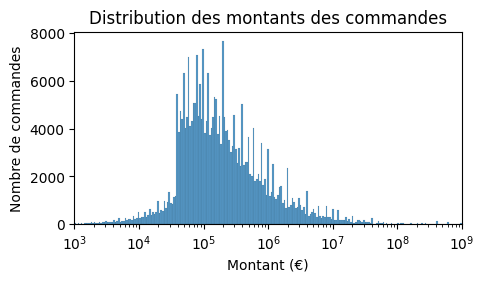

In [27]:
fig, ax = plt.subplots(figsize=(5, 2.5))
sns.histplot( montants_df,log_scale=True, ax=ax)
ax.set_xscale('log')
ax.set_xlim(10**3,10**9)
ax.set_xlabel('Montant (€)')
ax.set_ylabel('Nombre de commandes')
ax.set_title('Distribution des montants des commandes')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285444 entries, 0 to 285443
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   uid                              285444 non-null  object 
 1   id                               285444 non-null  object 
 2   nature                           285444 non-null  object 
 3   acheteur_id                      285444 non-null  object 
 4   acheteur_nom                     285252 non-null  object 
 5   acheteur_siren                   285274 non-null  object 
 6   titulaire_id                     285444 non-null  object 
 7   titulaire_typeIdentifiant        285444 non-null  object 
 8   objet                            285444 non-null  object 
 9   montant                          285444 non-null  float64
 10  codeCPV                          285444 non-null  object 
 11  procedure                        285444 non-null  object 
 12  du

In [38]:
data['formePrix'].value_counts()

formePrix
Forfaitaire    103058
Unitaire       101784
Mixte           80602
Name: count, dtype: int64

In [36]:
data[data['codeCPV'] == '45000000-7'][['objet']]

,objet
17,CVC et plomberie
24,MISE AUX NORMES ET RENOVATION DES SALLES POLYV...
45,SERRURERIE MENUISERIES EXTERIEURES OCCULTATIONS
89,LOT 1 DEMOLITIONS EXTER TERRASEMT VRD AMENAGMT...
102,Lot 12 Cloison mobile
...,...
285304,Salle des fêtes lot 12 VRD
285310,515TX02 MAZAN ABBAYE
285317,LOT 1 -TRAVAUX DIVERS ET ENTRETIEN DES COUVERT...
285368,ISOLATION PAILLE - ENDUIT


In [32]:
data['formePrix'].value_counts()

formePrix
Forfaitaire    103058
Unitaire       101784
Mixte           80602
Name: count, dtype: int64

In [33]:
data['ccag'].value_counts()

ccag
Fournitures courantes et services                     88709
Travaux                                               87456
Pas de CCAG                                           80122
Prestations intellectuelles                           15512
Maitrise d'œuvre                                       9736
Techniques de l'information et de la communication     3800
Marchés industriels                                     109
Name: count, dtype: int64

In [ ]:
years = data['datePublicationDonnees'].str[:4]
years.value_counts()

In [ ]:
years = data['dateNotification'].str[:4]
years.value_counts()

In [ ]:
data.info()

In [ ]:
data['ccag']

In [ ]:
data.describe()

In [ ]:
data['montant'].sum()/10**9

In [ ]:
data.head()

In [ ]:
query = f"""
SELECT *
FROM marches
"""

data_market = pd.read_sql_query(query, conn)
data_market.info()